## Common Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn


## Linear Regression


### Dataset

In [ ]:
from sklearn.datasets import load_diabetes


dataset = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(dataset.data[:,np.newaxis,2], dataset.target, test_size = 0.2)

### Sklearn

Mean squared error: 3667.30
Coefficient of determination: 0.41


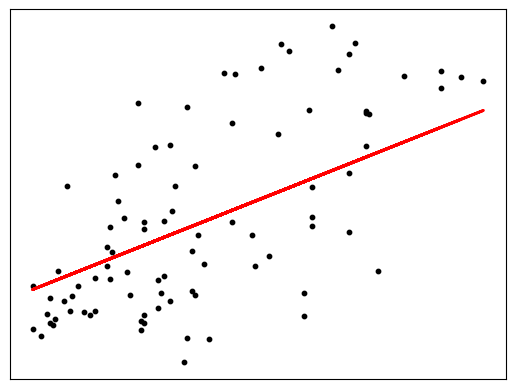

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color="black",s=10)
plt.plot(X_test, y_pred, color="red", linewidth=2)
plt.xticks(())
plt.yticks(())

plt.show()

### Pytorch

In [ ]:
class LinearRegressionPytorch(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
        self.criterion = nn.MSELoss()
        self.optim = torch.optim.SGD(self.parameters(),lr = 0.6)

    def forward(self,x):
        return self.linear(x)

    def train(self,x,y,epochs=1000):

        for i in range(epochs):
            # forward
            y_pred = self.forward(x)
            # error calc
            loss = self.criterion(y_pred,y)
            # backward
            self.optim.zero_grad()
            loss.backward()
            self.optim.step()

            if (i+1)%100 == 0:
                print(f"Epoch {i+1} -> Loss: {loss.item()}")

    def predict(self,x):
        return self.forward(x)

Epoch 100 -> Loss: 4991.71533203125
Epoch 200 -> Loss: 4486.033203125
Epoch 300 -> Loss: 4197.9287109375
Epoch 400 -> Loss: 4033.78515625
Epoch 500 -> Loss: 3940.265869140625
Epoch 600 -> Loss: 3886.985107421875
Epoch 700 -> Loss: 3856.62890625
Epoch 800 -> Loss: 3839.334228515625
Epoch 900 -> Loss: 3829.48095703125
Epoch 1000 -> Loss: 3823.866455078125
Mean squared error: 4217.49
Coefficient of determination: 0.30


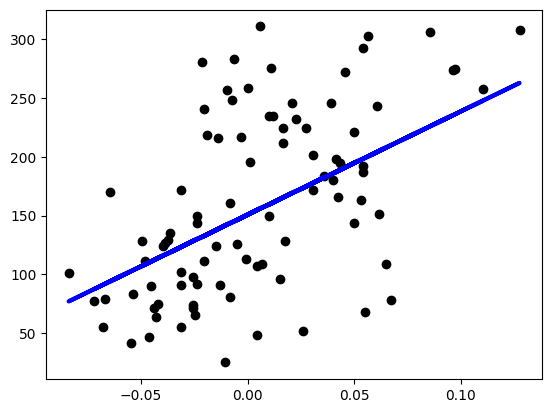

In [ ]:
X_train_tensor = torch.from_numpy(X_train).float().view(-1,1)
X_test_tensor = torch.from_numpy(X_test).float().view(-1,1)
y_train_tensor = torch.from_numpy(y_train).float().view(-1,1)
y_test_tensor = torch.from_numpy(y_test).float().view(-1,1)


model = LinearRegressionPytorch()
model.train(X_train_tensor,y_train_tensor)

y_pred = model.predict(X_test_tensor)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred.detach().numpy()))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred.detach().numpy()))

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred.detach().numpy(), color="blue", linewidth=3)

plt.show()

## Logistic Regression

### Dataset


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

data,target = load_breast_cancer(return_X_y = True)
data = StandardScaler().fit_transform(data)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2)
print(X_train.shape,y_train.shape)


(455, 30) (455,)


### Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"Precision:{precision_score(y_test,y_pred)}")
print(f"Recall:{recall_score(y_test,y_pred)}")
print(f"f1 score:{f1_score(y_test,y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")


Accuracy:0.9824561403508771
Precision:0.9733333333333334
Recall:1.0
f1 score:0.9864864864864865
Confusion Matrix:
[[39  2]
 [ 0 73]]


### Pytorch

In [ ]:
class LogisticRegressionPytorch(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.linear = nn.Linear(num_features,1)
        self.sigmoid = nn.Sigmoid()
        self.criterion = nn.BCELoss()
        self.optim = torch.optim.SGD(self.parameters(),lr = 0.02)

    def forward(self,x):
        return self.sigmoid(self.linear(x))

    def predict(self,x):
        with torch.no_grad():
            return self.forward(x)

    def train(self,x,y,epochs=1000):
        y = y.float()
        for i in range(epochs):
            # forward
            predictions = self(x)
            # loss calculation
            loss = self.criterion(predictions,y)
            # backward
            self.optim.zero_grad()
            loss.backward()
            self.optim.step()

            if (i+1)%100 == 0:
                print(f"Epoch {i+1} -> Loss: {loss.item()}")


In [ ]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).float().view(-1,1)

print(X_train_tensor[0])

tensor([-0.4821, -0.5328, -0.5507, -0.5051, -1.4795, -1.3228, -0.9464, -0.8236,
        -1.2399, -1.0189, -0.0988,  1.7838, -0.1876, -0.2019,  0.1053, -0.8209,
        -0.7273, -0.0967,  1.6694, -0.3154, -0.6977, -0.8903, -0.7596, -0.6411,
        -2.1163, -1.3177, -1.1985, -1.3138, -1.6174, -1.3647])


In [ ]:
model = LogisticRegressionPytorch(X_train_tensor.shape[1])
model.train(X_train_tensor,y_train_tensor)

y_pred = model.predict(X_test_tensor).detach().numpy().round()

print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"Precision:{precision_score(y_test,y_pred)}")
print(f"Recall:{recall_score(y_test,y_pred)}")
print(f"f1 score:{f1_score(y_test,y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")

Epoch 100 -> Loss: 0.19306860864162445
Epoch 200 -> Loss: 0.14331747591495514
Epoch 300 -> Loss: 0.12281534075737
Epoch 400 -> Loss: 0.1111065149307251
Epoch 500 -> Loss: 0.10332375764846802
Epoch 600 -> Loss: 0.09767866879701614
Epoch 700 -> Loss: 0.09334541857242584
Epoch 800 -> Loss: 0.08988428115844727
Epoch 900 -> Loss: 0.0870370864868164
Epoch 1000 -> Loss: 0.08464109897613525
Accuracy:0.9824561403508771
Precision:0.9733333333333334
Recall:1.0
f1 score:0.9864864864864865
Confusion Matrix:
[[39  2]
 [ 0 73]]


## Decision Tree

### Dataset

In [ ]:
from sklearn.datasets import load_iris

data, target = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

### Sklearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"Precision:{precision_score(y_test,y_pred,average = 'macro')}")
print(f"Recall:{recall_score(y_test,y_pred,average = 'macro')}")
print(f"f1 score:{f1_score(y_test,y_pred,average = 'macro')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")

Accuracy:0.9333333333333333
Precision:0.9523809523809524
Recall:0.9166666666666666
f1 score:0.9267399267399267
Confusion Matrix:
[[10  0  0]
 [ 0 12  0]
 [ 0  2  6]]


## Random Forest

### Dataset

In [ ]:
from sklearn.datasets import load_wine

data, target = load_wine(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size = 0.2)

### Sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"Precision:{precision_score(y_test,y_pred,average = 'macro')}")
print(f"Recall:{recall_score(y_test,y_pred,average = 'macro')}")
print(f"f1 score:{f1_score(y_test,y_pred,average = 'macro')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")

Accuracy:1.0
Precision:1.0
Recall:1.0
f1 score:1.0
Confusion Matrix:
[[ 7  0  0]
 [ 0 18  0]
 [ 0  0 11]]


## Naive Bayes


### Dataset

In [ ]:
from sklearn.datasets import load_digits

data, target = load_digits(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size = 0.2)

### Sklearn

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"Precision:{precision_score(y_test,y_pred,average = 'macro')}")
print(f"Recall:{recall_score(y_test,y_pred,average = 'macro')}")
print(f"f1 score:{f1_score(y_test,y_pred,average = 'macro')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")

Accuracy:0.8611111111111112
Precision:0.8811131717771092
Recall:0.8620352882884852
f1 score:0.8623004875045013
Confusion Matrix:
[[32  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  1  4  0]
 [ 0  3 21  8  0  0  0  0  3  0]
 [ 0  0  2 40  0  1  0  1  1  1]
 [ 0  0  0  0 37  0  0  2  0  0]
 [ 0  0  0  2  0 35  0  3  0  0]
 [ 0  0  0  0  1  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  2  0  0  0  1 28  0]
 [ 0  1  0  7  0  1  0  3  1 26]]


## Support Vector Machine

### Dataset

In [ ]:
from sklearn.datasets import load_iris

data, target = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

### Sklearn

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = SVC(decision_function_shape='ovo')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"Precision:{precision_score(y_test,y_pred,average = 'macro')}")
print(f"Recall:{recall_score(y_test,y_pred,average = 'macro')}")
print(f"f1 score:{f1_score(y_test,y_pred,average = 'macro')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")

Accuracy:1.0
Precision:1.0
Recall:1.0
f1 score:1.0
Confusion Matrix:
[[12  0  0]
 [ 0  7  0]
 [ 0  0 11]]


## K-Nearest Neighbors (KNN)

### Dataset

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

data,target = load_wine(return_X_y = True)
data = StandardScaler().fit_transform(data)
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size = 0.2)

### Sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = KNeighborsClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"Precision:{precision_score(y_test,y_pred,average = 'macro')}")
print(f"Recall:{recall_score(y_test,y_pred,average = 'macro')}")
print(f"f1 score:{f1_score(y_test,y_pred,average = 'macro')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")

Accuracy:0.9722222222222222
Precision:0.9696969696969697
Recall:0.9743589743589745
f1 score:0.9707936507936509
Confusion Matrix:
[[10  0  0]
 [ 1 12  0]
 [ 0  0 13]]


### Implementation from Scratch

In [ ]:
import numpy as np
from collections import Counter
import heapq

class KNN():
    def __init__(self,k=5):
        self.k = k

    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))

    def predict(self,X_test):
        res = []
        for i in range(len(X_test)):
            heap = []
            for j in range(len(self.X_train)):
                distance = self.euclidean_distance(self.X_train[j],X_test[i])
                if len(heap) < self.k:
                    heapq.heappush(heap,(-distance,self.y_train[j]))
                else:
                    heapq.heappushpop(heap,(-distance,self.y_train[j]))
            labels = [label for _,label in heap]
            c = Counter(labels)
            res.append(c.most_common(1)[0][0])

        return res

In [ ]:
model_KNN = KNN()
model_KNN.fit(X_train,y_train)

y_pred = model_KNN.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"Precision:{precision_score(y_test,y_pred,average = 'macro')}")
print(f"Recall:{recall_score(y_test,y_pred,average = 'macro')}")
print(f"f1 score:{f1_score(y_test,y_pred,average = 'macro')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")

Accuracy:0.9722222222222222
Precision:0.9696969696969697
Recall:0.9743589743589745
f1 score:0.9707936507936509
Confusion Matrix:
[[10  0  0]
 [ 1 12  0]
 [ 0  0 13]]


## K-Mean

### Dataset

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()

data = iris_data.data
num_classes = len(iris_data.target_names)

### Sklearn

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters = num_classes,n_init = 'auto')

model.fit(data)

y_pred = model.predict(data)

print(f"Silhouette:{silhouette_score(data,y_pred)}")
print(f"Inertia:{model.inertia_}")

Silhouette:0.551191604619592
Inertia:78.85566582597727


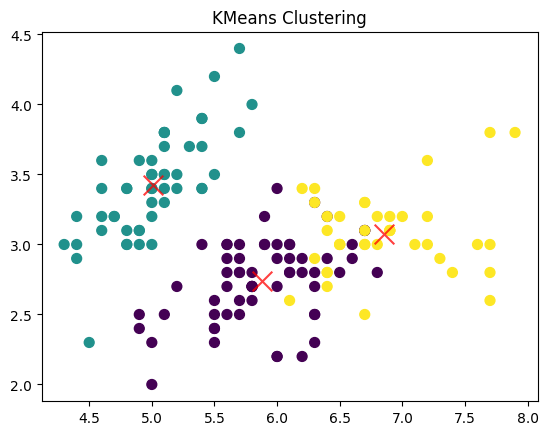

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=y_pred, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('KMeans Clustering')
plt.show()